<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/news_categories_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### How to use this project to in your colab notebook

Follow the steps:-

    1. Download Your Kaggle APIs Key and password file from your kaggle account in setting section
    2. Upload APIs key json file in your colab notebook and then run 3 cell of line which start from 2 upto 4 (these cell should only one time)

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rmisra/news-category-dataset

 41% 11.0M/26.5M [00:00<00:00, 113MB/s]
100% 26.5M/26.5M [00:00<00:00, 167MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile("/content/news-category-dataset.zip",'r')
zip.extractall("/content")
zip.close()

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)

In [7]:
df.shape

(209527, 6)

In [8]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [9]:
new_df=df[['headline','category']]

In [10]:
new_df.head()

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS


In [11]:
new_df.shape

(209527, 2)

In [12]:
i=29
print(new_df[['headline','category']].loc[i])
print(new_df['headline'].loc[i])

headline    'French Spider-Man' Celebrates 60th Birthday W...
category                                           WEIRD NEWS
Name: 29, dtype: object
'French Spider-Man' Celebrates 60th Birthday With A Massive Skyscraper Climb


In [13]:
print("Number of category :-",len(new_df['category'].unique()))
new_df['category'].unique()

Number of category :- 42


array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [14]:
new_df.isnull().sum()

headline    0
category    0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  209527 non-null  object
 1   category  209527 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


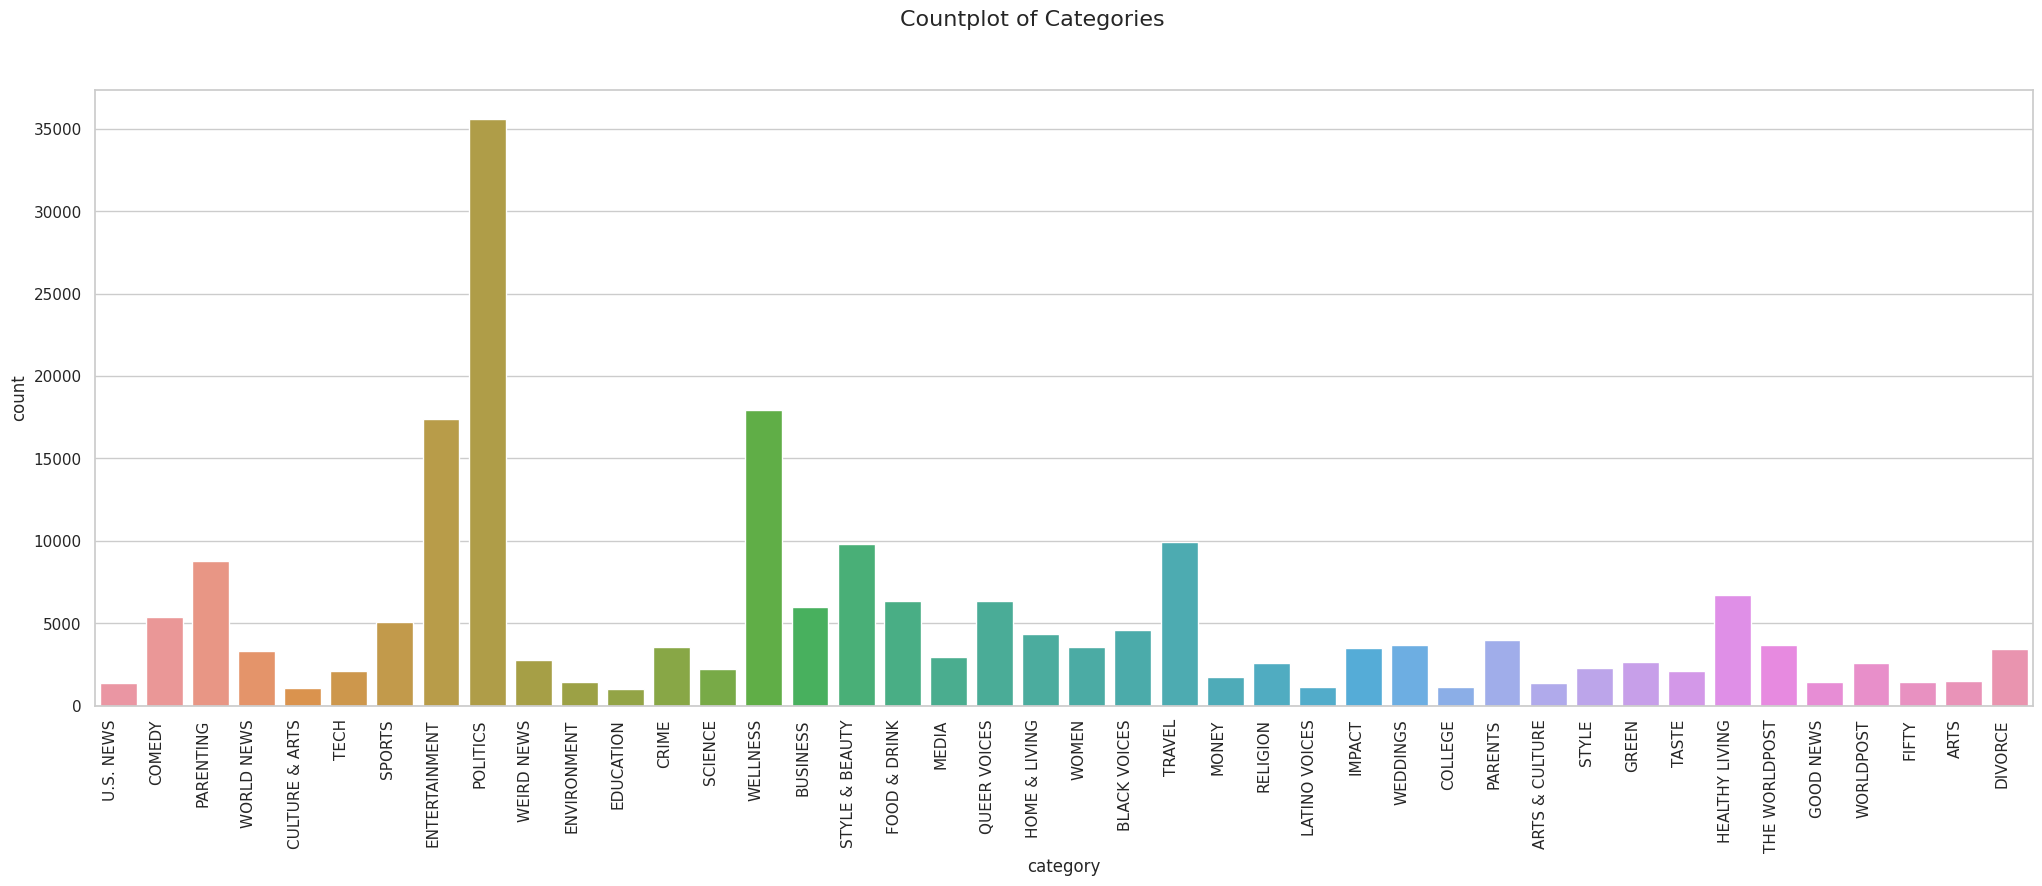

In [90]:
plt.figure(figsize=(25, 8))
sns.set(style="whitegrid")  # Optional: Set a seaborn style

# Create your countplot
ax = sns.countplot(data=new_df, x='category')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Adjust the rotation angle as needed
# Add a super title
plt.suptitle("Countplot of Categories", fontsize=16)

plt.show()

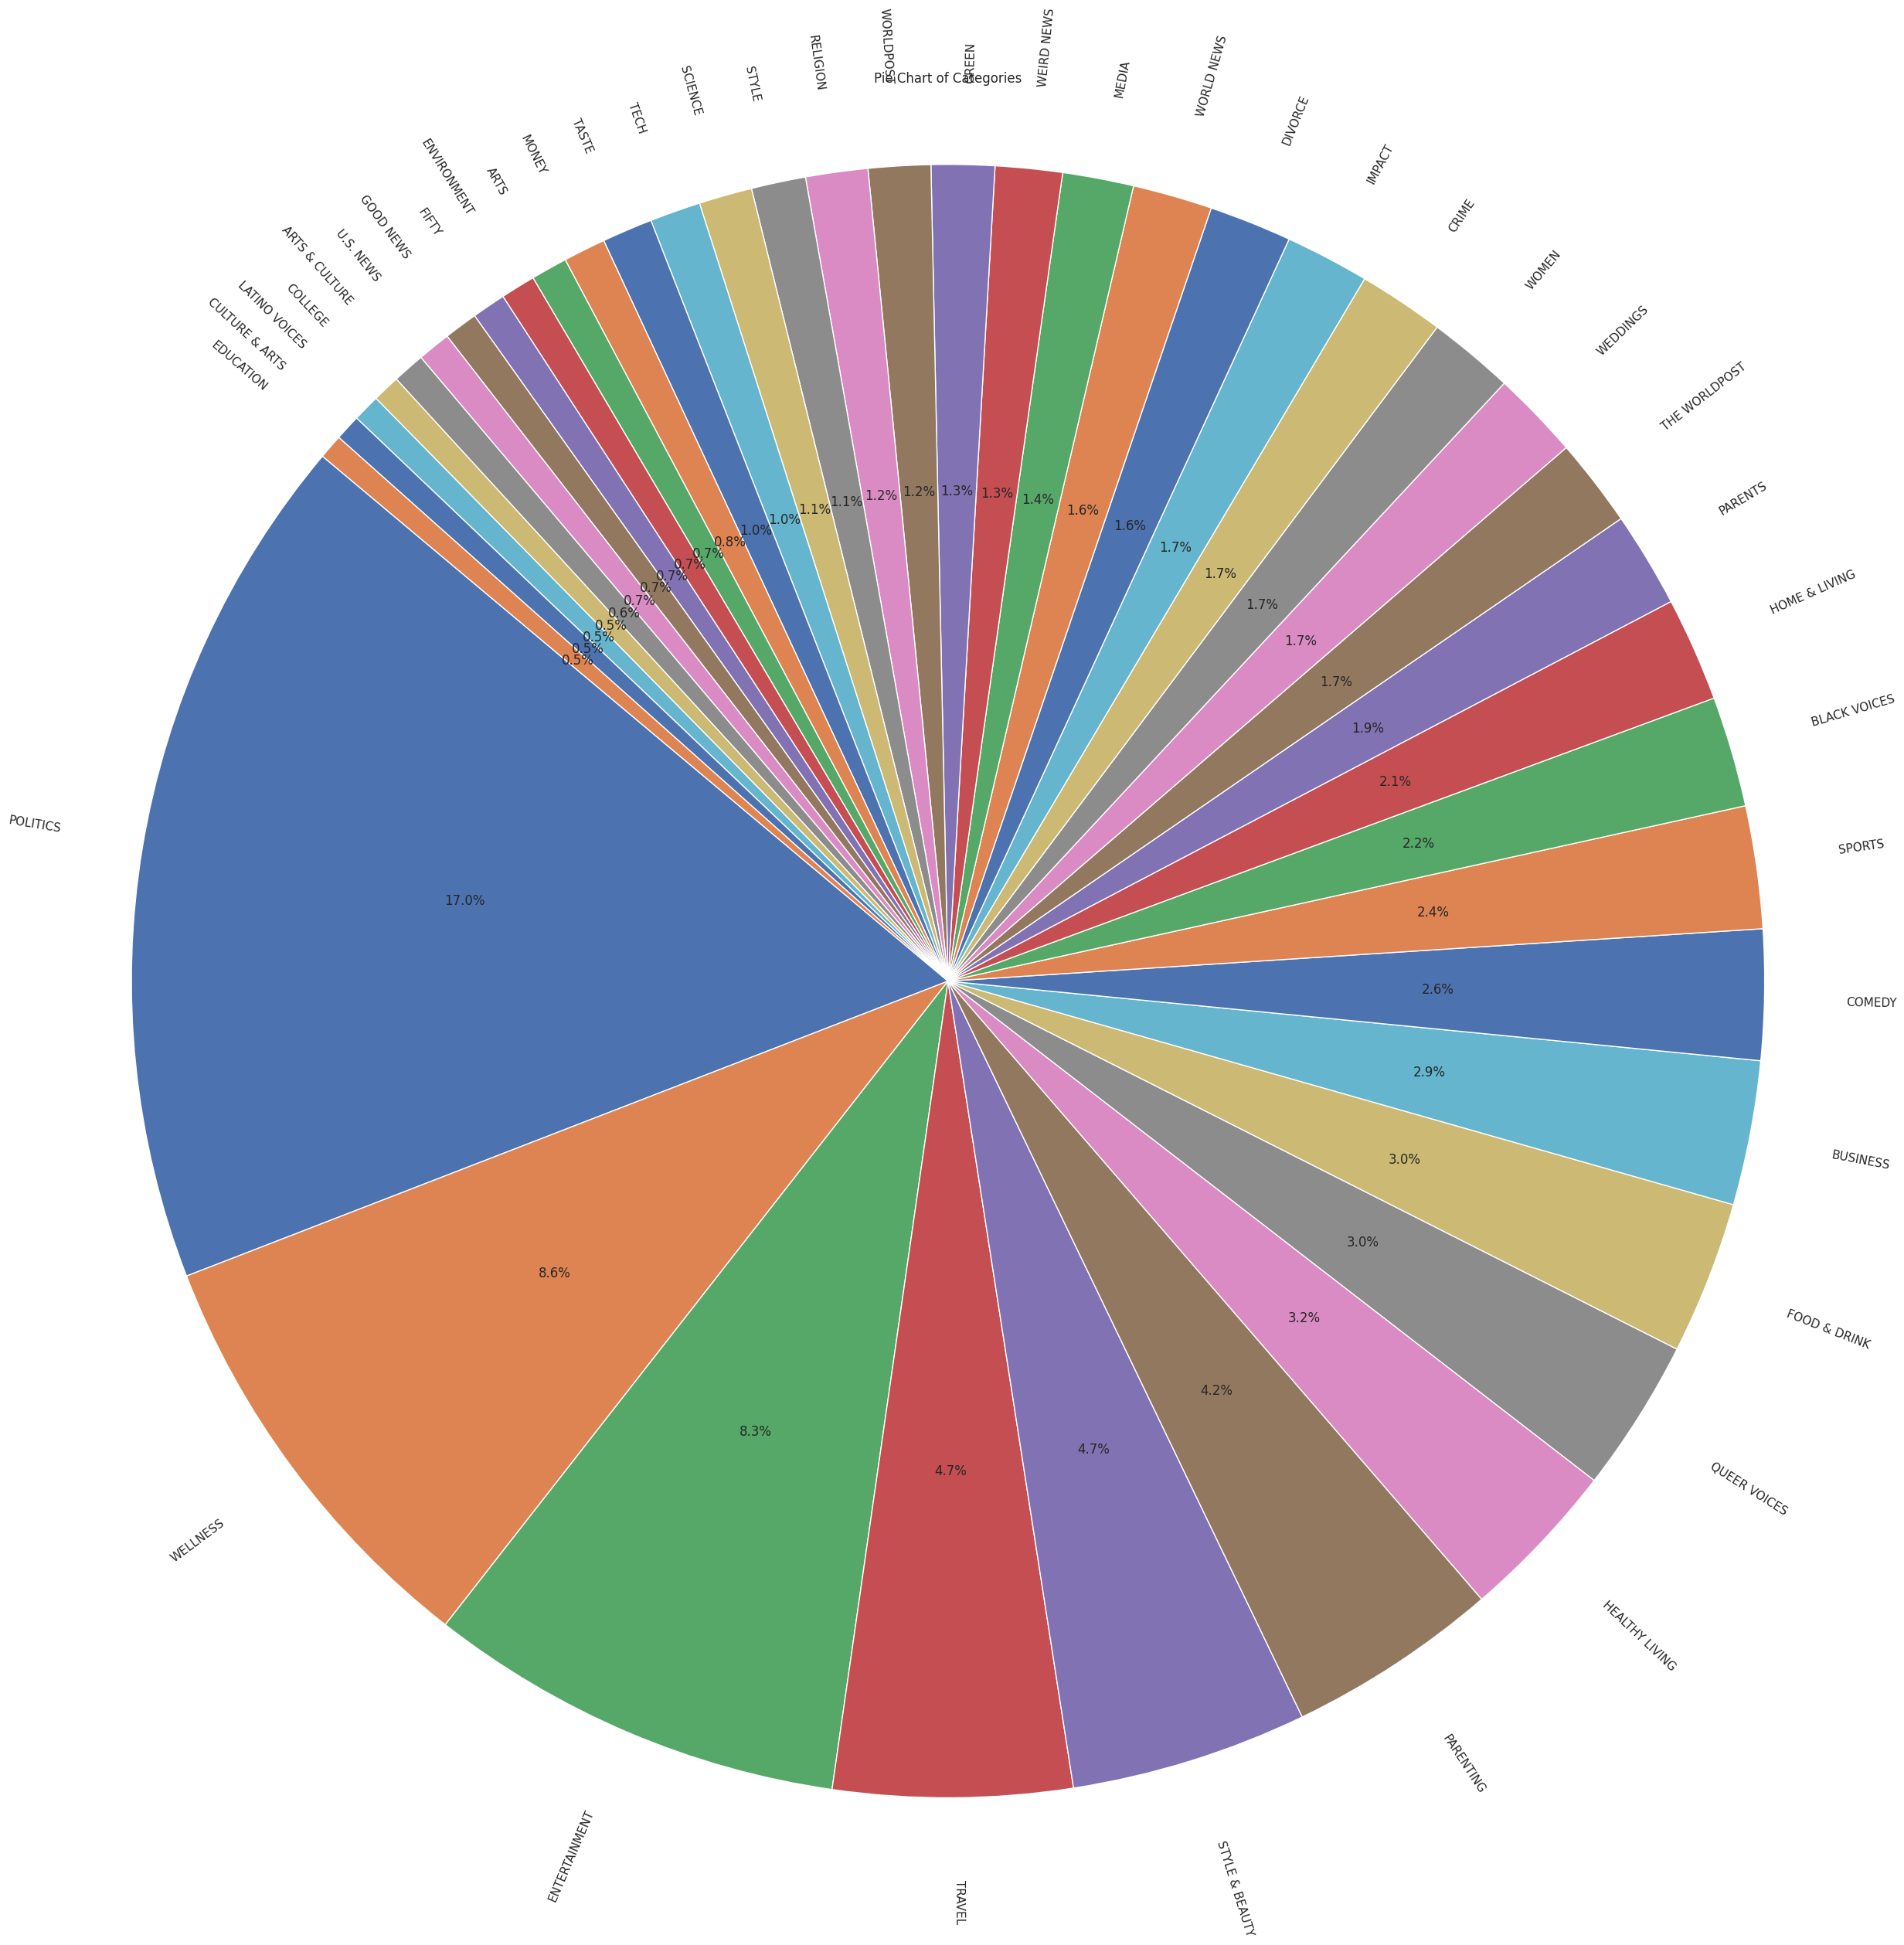

In [85]:
# Create pie chart
plt.figure(figsize=(30, 30))
pie_data = new_df['category'].value_counts()

# Rotate category labels by 90 degrees
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, rotatelabels=True)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title("Pie Chart of Categories")
plt.show()

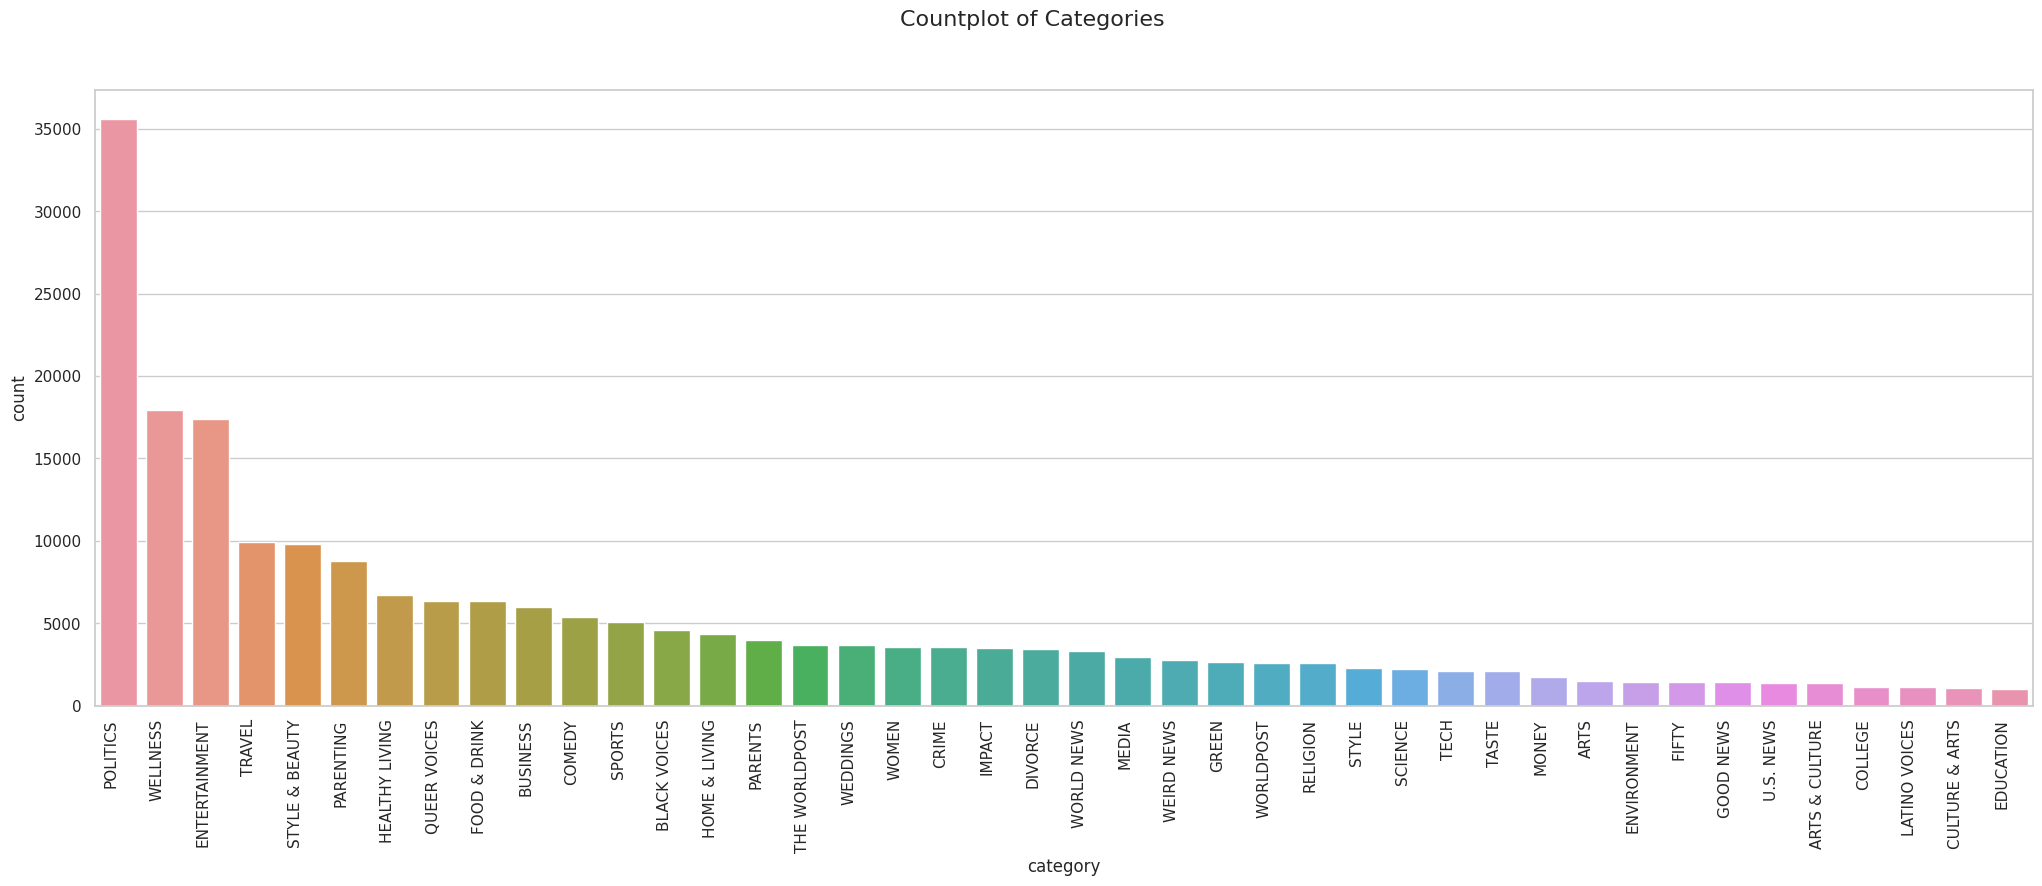

In [91]:
plt.figure(figsize=(25, 8))
sns.set(style="whitegrid")

# Create your countplot with sorted categories
order = new_df['category'].value_counts().index  # Sort categories in decreasing order
ax = sns.countplot(data=new_df, x='category', order=order)

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
# Add a super title
plt.suptitle("Countplot of Categories", fontsize=16)

plt.show()

# Text Preprocessing Steps:-
1. Remove html tags
2. Remove special characters
3. Converting every thing to lower case
4. Removeing stop words
5. Stemming

In [16]:
!pip install --upgrade nltk

In [17]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
##downloading the stopwords from the nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
ps=PorterStemmer()
# wordnet=WordNetLemmatizer()

In [19]:
len(new_df['headline'])

209527

In [20]:
# Cleaning the texts
corpus_s = []
# corpus_l = []
for i in range(len(new_df['headline'])):
    review = re.sub('[^a-zA-Z]', ' ', new_df['headline'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_s.append(review)


In [21]:
corpus_s[:10]

['million american roll sleev omicron target covid booster',
 'american airlin flyer charg ban life punch flight attend video',
 'funniest tweet cat dog week sept',
 'funniest tweet parent week sept',
 'woman call cop black bird watcher lose lawsuit ex employ',
 'cleaner dead belk bathroom day bodi found polic',
 'report get ador surpris boyfriend live tv',
 'puerto rican desper water hurrican fiona rampag',
 'new documentari captur complex child immigr',
 'biden un call russian war affront bodi charter']

In [22]:
##creating the Bag Of Words model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report

In [23]:
# Preprocess data
X = new_df['headline']
y = new_df['category']

In [24]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Tokenize and vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=2500)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [26]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [27]:
X_train_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# Build a basic neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

In [29]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history=model.fit(X_train_vec,y_train_encoded,epochs=10,validation_data=(X_test_vec,y_test_encoded),batch_size=32)

Epoch 1/10
4584/4584 [==============================] - 44s 9ms/step - loss: 2.1047 - accuracy: 0.4569 - val_loss: 1.8363 - val_accuracy: 0.5101
Epoch 2/10
4584/4584 [==============================] - 40s 9ms/step - loss: 1.7392 - accuracy: 0.5266 - val_loss: 1.7929 - val_accuracy: 0.5185
Epoch 3/10
4584/4584 [==============================] - 40s 9ms/step - loss: 1.6263 - accuracy: 0.5470 - val_loss: 1.7834 - val_accuracy: 0.5200
Epoch 4/10
4584/4584 [==============================] - 43s 9ms/step - loss: 1.5323 - accuracy: 0.5664 - val_loss: 1.7832 - val_accuracy: 0.5227
Epoch 5/10
4584/4584 [==============================] - 40s 9ms/step - loss: 1.4421 - accuracy: 0.5873 - val_loss: 1.8084 - val_accuracy: 0.5199
Epoch 6/10
4584/4584 [==============================] - 39s 9ms/step - loss: 1.3546 - accuracy: 0.6086 - val_loss: 1.8476 - val_accuracy: 0.5185
Epoch 7/10
4584/4584 [==============================] - 40s 9ms/step - loss: 1.2673 - accuracy: 0.6315 - val_loss: 1.9098 - val_ac

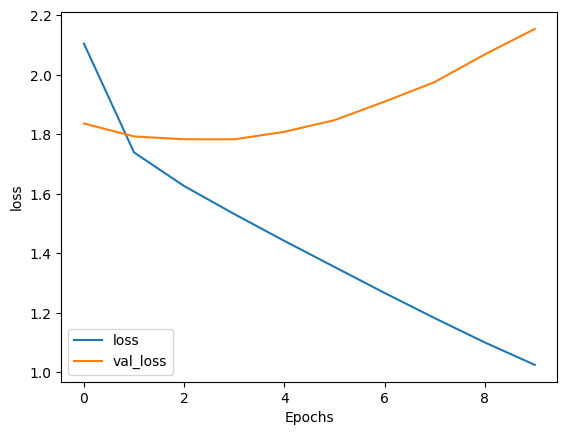

In [31]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

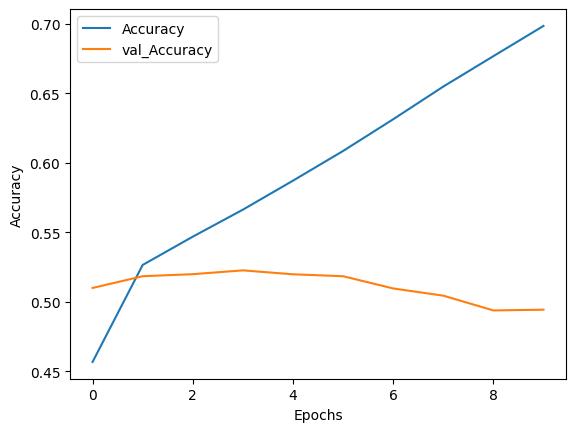

In [32]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='val_Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [33]:
y_pred_ann=model.predict(X_test_vec)

1965/1965 [==============================] - 6s 3ms/step


In [34]:
threshold=0.5
y_pred_binary=(y_pred_ann >= threshold).astype(int)

In [35]:
len(y_test_encoded),len(y_pred_binary)

(62859, 62859)

In [36]:
# Convert one-hot encoded predictions to integer-encoded predictions
y_pred_int = tf.argmax(y_pred_ann, axis=1)

# Convert integer-encoded predictions back to original labels
y_pred_labels = label_encoder.inverse_transform(y_pred_int)

# Calculate accuracy using scikit-learn's accuracy_score
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.4944


#### **Testing on some sample text**

In [38]:
# Make predictions (same as before)
sample_headlines = ["Breaking news: New discovery in space", "Stock market reaches all-time high"]
sample_headlines_vec = vectorizer.transform(sample_headlines).toarray()
predictions = model.predict(sample_headlines_vec)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=-1))
print(predicted_categories)

1/1 [==============================] - 0s 27ms/step
['MEDIA' 'BUSINESS']


In [39]:
from tensorflow.keras.layers import Dropout

# Build a neural network model with regularization and dropout
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)))
model1.add(Dropout(0.3))  # Add dropout layer
model1.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Add L2 regularization
model1.add(Dropout(0.3))  # Add dropout layer
model1.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [40]:
# Compile the model
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history1=model1.fit(X_train_vec, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_vec, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50
4584/4584 [==============================] - 44s 9ms/step - loss: 2.7281 - accuracy: 0.3316 - val_loss: 2.3139 - val_accuracy: 0.4312
Epoch 2/50
4584/4584 [==============================] - 48s 10ms/step - loss: 2.3118 - accuracy: 0.4336 - val_loss: 2.1560 - val_accuracy: 0.4662
Epoch 3/50
4584/4584 [==============================] - 42s 9ms/step - loss: 2.1904 - accuracy: 0.4587 - val_loss: 2.0779 - val_accuracy: 0.4785
Epoch 4/50
4584/4584 [==============================] - 48s 11ms/step - loss: 2.1231 - accuracy: 0.4702 - val_loss: 2.0434 - val_accuracy: 0.4821
Epoch 5/50
4584/4584 [==============================] - 43s 9ms/step - loss: 2.0721 - accuracy: 0.4799 - val_loss: 2.0053 - val_accuracy: 0.4932
Epoch 6/50
4584/4584 [==============================] - 45s 10ms/step - loss: 2.0330 - accuracy: 0.4867 - val_loss: 1.9875 - val_accuracy: 0.4929
Epoch 7/50
4584/4584 [==============================] - 45s 10ms/step - loss: 2.0034 - accuracy: 0.4940 - val_loss: 1.9754 - va

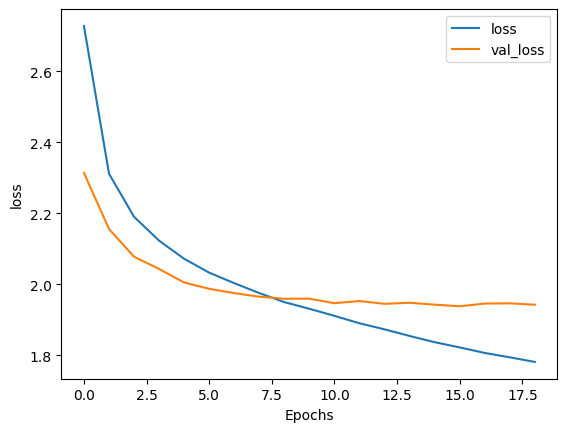

In [42]:
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

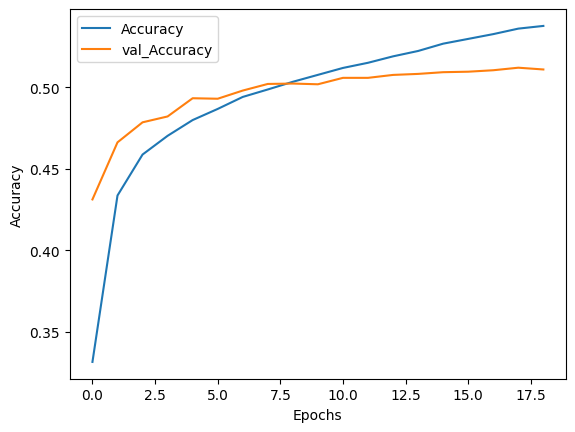

In [43]:
plt.plot(history1.history['accuracy'],label='Accuracy')
plt.plot(history1.history['val_accuracy'],label='val_Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### **Testing on some sample text**

In [44]:
# Make predictions (same as before)
sample_headlines = ["Breaking news: New discovery in space", "Stock market reaches all-time high"]
sample_headlines_vec = vectorizer.transform(sample_headlines).toarray()
predictions = model1.predict(sample_headlines_vec)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=-1))
print(predicted_categories)

1/1 [==============================] - 0s 76ms/step
['SCIENCE' 'BUSINESS']


In [45]:
# Make predictions (same as before)
sample_headlines = ["Economists predict steady growth in job market for 2023","New study reveals surprising health benefits of chocolate"]
sample_headlines_vec = vectorizer.transform(sample_headlines).toarray()
predictions = model1.predict(sample_headlines_vec)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=-1))
print(predicted_categories)

1/1 [==============================] - 0s 28ms/step
['BUSINESS' 'WELLNESS']


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
##initilazition of voc. size
voc_size=5000

one_hot_rep=[one_hot(word, voc_size) for word in corpus_s]

In [48]:
one_hot_rep[:10]

[[1351, 4825, 4868, 3564, 4470, 965, 4244, 3614],
 [4825, 2826, 543, 3097, 674, 2209, 2705, 2554, 1835, 1054],
 [2685, 2318, 1054, 4251, 1605, 1713],
 [2685, 2318, 4149, 1605, 1713],
 [3514, 570, 2915, 1190, 51, 1772, 4855, 3000, 2435, 156],
 [4300, 4054, 4779, 1136, 4125, 1007, 1215, 1614],
 [4036, 3574, 2665, 3763, 4660, 2894, 2818],
 [1102, 2324, 650, 468, 2715, 2906, 3259],
 [2046, 710, 3366, 2312, 3164, 1296],
 [180, 512, 570, 455, 4556, 4063, 1007, 2557]]

In [49]:
sent_length=50
embedd_doc=pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)

In [50]:
print(embedd_doc,embedd_doc.shape)

[[   0    0    0 ...  965 4244 3614]
 [   0    0    0 ... 2554 1835 1054]
 [   0    0    0 ... 4251 1605 1713]
 ...
 [   0    0    0 ...  390 1944 1054]
 [   0    0    0 ... 2306  129 3054]
 [   0    0    0 ...  343 1120  399]] (209527, 50)


In [51]:
# Build an RNN model
##declaring the embedding features
embedding_vector_features=50

##model initilization
model3=Sequential()

model3.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model3.add(LSTM(100))

model3.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [52]:
vectorizer.get_feature_names_out()

array(['000', '10', '100', ..., 'youtube', 'zika', 'zoo'], dtype=object)

In [53]:
# Compile the model
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
X_final=embedd_doc
y_final=np.array(y)
y_final

array(['U.S. NEWS', 'U.S. NEWS', 'COMEDY', ..., 'SPORTS', 'SPORTS',
       'SPORTS'], dtype=object)

In [55]:
print(X_final.shape,y_final.shape,type(y_final),type(X_final))

(209527, 50) (209527,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.33,random_state=42)

In [57]:
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.fit_transform(y_test)

In [58]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
histroy2=model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
4387/4387 [==============================] - 330s 75ms/step - loss: 2.2615 - accuracy: 0.4178 - val_loss: 1.9104 - val_accuracy: 0.4877
Epoch 2/50
4387/4387 [==============================] - 318s 73ms/step - loss: 1.7663 - accuracy: 0.5209 - val_loss: 1.7897 - val_accuracy: 0.5120
Epoch 3/50
4387/4387 [==============================] - 314s 72ms/step - loss: 1.6131 - accuracy: 0.5513 - val_loss: 1.7592 - val_accuracy: 0.5184
Epoch 4/50
4387/4387 [==============================] - 328s 75ms/step - loss: 1.5111 - accuracy: 0.5734 - val_loss: 1.7461 - val_accuracy: 0.5239
Epoch 5/50
4387/4387 [==============================] - 315s 72ms/step - loss: 1.4222 - accuracy: 0.5949 - val_loss: 1.7519 - val_accuracy: 0.5245
Epoch 6/50
4387/4387 [==============================] - 316s 72ms/step - loss: 1.3429 - accuracy: 0.6147 - val_loss: 1.7886 - val_accuracy: 0.5224
Epoch 7/50
4387/4387 [==============================] - 314s 71ms/step - loss: 1.2687 - accuracy: 0.6339 - val_loss: 1

In [59]:
y_pred_lstm=model3.predict(X_test)

2161/2161 [==============================] - 39s 18ms/step


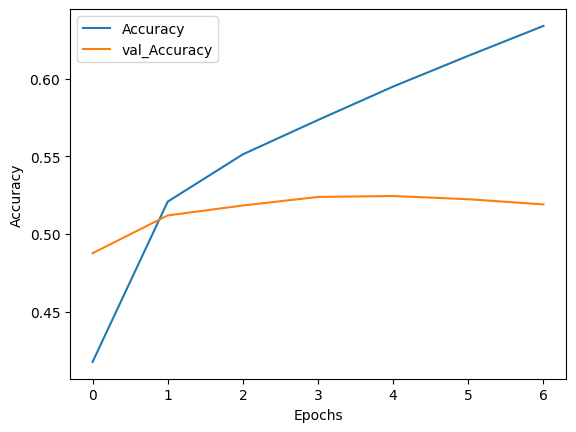

In [60]:
plt.plot(histroy2.history['accuracy'],label='Accuracy')
plt.plot(histroy2.history['val_accuracy'],label='val_Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

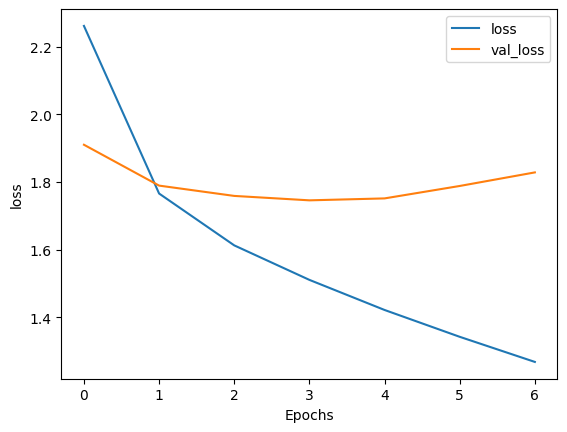

In [61]:
plt.plot(histroy2.history['loss'],label='loss')
plt.plot(histroy2.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

#### **Testing on some sample Texts**

In [62]:
# Make predictions (same as before)
sample_headlines = ["Breaking news: New discovery in space", "Stock market reaches all-time high"]
sample_headlines_vec = vectorizer.transform(sample_headlines).toarray()
predictions = model1.predict(sample_headlines_vec)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=-1))
print(predicted_categories)

1/1 [==============================] - 0s 31ms/step
['SCIENCE' 'BUSINESS']


In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer

sample_headlines = ["Economists predict steady growth in job market for 2023", "New study reveals surprising health benefits of chocolate"]

tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(sample_headlines)  # Assuming train_headlines is your training data

# Tokenize the sample headlines using the same tokenizer
sample_sequences = tokenizer.texts_to_sequences(sample_headlines)
sample_sequences_padded = pad_sequences(sample_sequences, maxlen=50)

# Make predictions
predictions = model3.predict(sample_sequences_padded)
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=1))
print(predicted_categories)

1/1 [==============================] - 0s 32ms/step
['STYLE & BEAUTY' 'ENTERTAINMENT']
